In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import scripts.processing as p 
import seaborn as sns

from sklearn.feature_selection import  SelectFromModel
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc,  roc_auc_score,f1_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import statsmodels.api as sm

c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\preprocessing.py:93: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dft_temp.fillna(dft_temp.mean(), inplace=True)
c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\preprocessing.py:93: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dft_temp.fillna(dft_temp.mean(), inplace=True)
c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\preprocessing.py:93: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dft_temp.fillna(dft_temp.mean(), inplace=True)
c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\preprocessing.py:93: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will includ

Optimization terminated successfully.
         Current function value: 0.307359
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.332828
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.352277
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.368920
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.373634
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.374643
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366504
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.356851
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.351050
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.354222
  

c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\processing.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dft[f"{col} lag {lags_optimal[col]}"]= dft[col].shift(lags_optimal[col])
c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\processing.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dft[f"{col} lag {lags_optimal[col]}"]= dft[col].shift(lags_optimal[col])
c:\Users\yoanj\Documents\M1S2\Projet_s2\Prev_crise_eco\scripts\processing.py:51: PerformanceWarning: DataFrame is highly fragmented.  

Optimization terminated successfully.
         Current function value: 0.298393
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313821
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.286730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300819
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.260632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250117
  

# Import des données précédentes nécessaires

In [2]:
dft=p.dft
meilleure_combinaison_F1=p.meilleure_combinaison_F1

In [3]:
meilleure_combinaison_F1

['const', 'FPIx', 'CMRMTSPLx', 'GS10TB3Mx lag 4', 'IPMANSICS']

# Split

In [4]:
split =pd.to_datetime('01/03/1995') # date du split

train_df = dft[dft['DATE'] < split]
test_df = dft[dft['DATE'] >= split]

X_train, y_train = train_df.drop(columns=['DATE','USRECD']),train_df["USRECD"]
X_test,y_test=test_df.drop(columns=['DATE','USRECD']),test_df["USRECD"]

# Estimation du modèle

## Notre estimation (prolongement)

In [5]:
# on enlève 'const' car pas dans X_train de base
meilleure_combinaison_F1.remove('const')

#estimation avec meilleure combinaison trouvée au sens du F1
X_train_bm=sm.add_constant(X_train[meilleure_combinaison_F1]) #X train best model
logit_model=sm.Logit(y_train,X_train_bm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.167589
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 USRECD   No. Observations:                  134
Model:                          Logit   Df Residuals:                      129
Method:                           MLE   Df Model:                            4
Date:                Sat, 27 May 2023   Pseudo R-squ.:                  0.5894
Time:                        19:09:03   Log-Likelihood:                -22.457
converged:                       True   LL-Null:                       -54.699
Covariance Type:            nonrobust   LLR p-value:                 3.305e-13
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.3056      0.520     -2.510      0.012      -2.325      -0.286
FPIx          

# Prédiction + Matrice de confusion

In [6]:
X_test_bm=sm.add_constant(X_test[meilleure_combinaison_F1])
pred = result.predict(X_test_bm)
confusion = confusion_matrix(y_test, pred.apply(lambda x: 1 if x>0.5 else 0))
confusion

array([[100,   2],
       [  0,   9]], dtype=int64)

In [7]:
print(f1_score(y_test,pred.apply(lambda x: 1 if x>0.5 else 0)))

0.9


# Graphiques

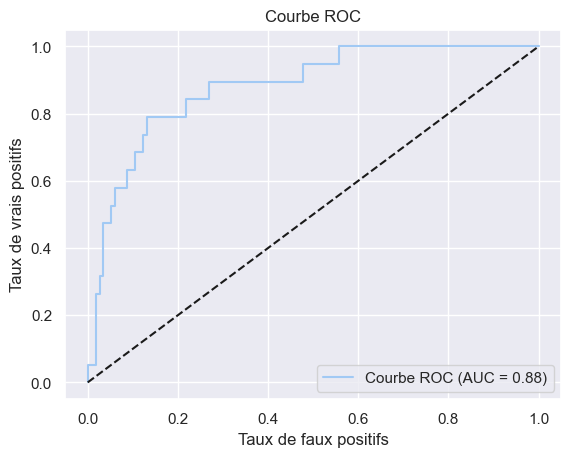

In [11]:
# Logit
model = LogisticRegression()
model.fit(X_train_bm[meilleure_combinaison_F1], y_train)

#in sample
# Prédiction pour train
y_pred = model.predict_proba(X_train_bm[meilleure_combinaison_F1])[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

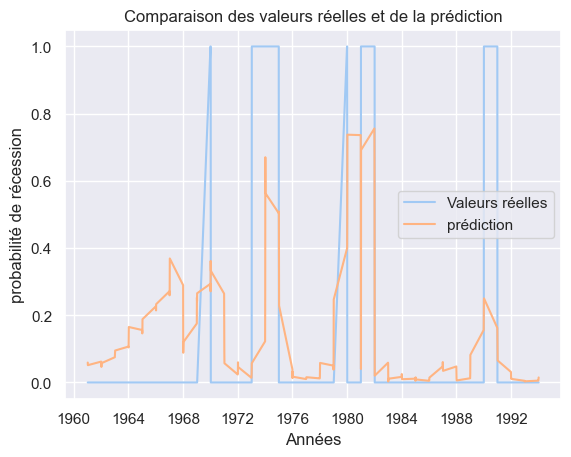

In [12]:
# Comparaison des valeurs réelles et de la prédiction
dates_train = train_df['DATE']

plt.plot(dates_train,y_train, label='Valeurs réelles')
plt.plot(dates_train,y_pred, label='prédiction')
plt.xlabel('Années')
plt.ylabel('probabilité de récession')
plt.title('Comparaison des valeurs réelles et de la prédiction')
plt.legend()

plt.show()

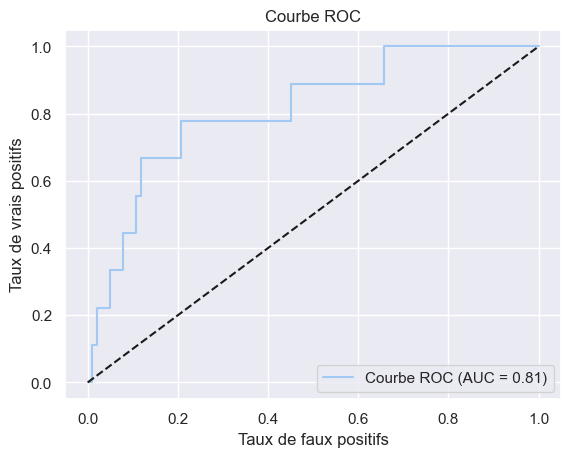

In [13]:
#out sample

# Prédire données test
y_pred = model.predict_proba(X_test[meilleure_combinaison_F1])[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

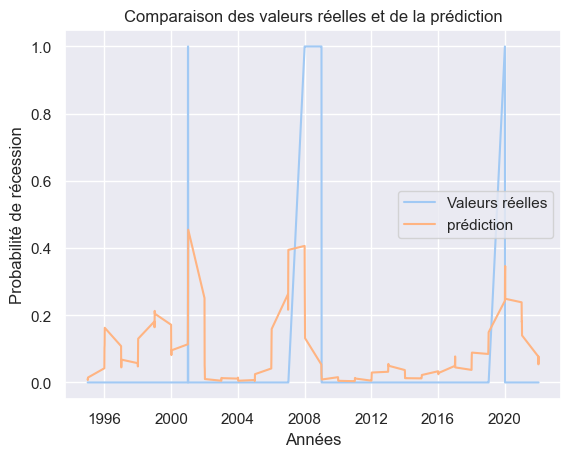

In [14]:
# Comparaison des valeurs réelles et de la prédiction
dates_test = test_df['DATE']
plt.plot(dates_test, y_test, label='Valeurs réelles')
plt.plot(dates_test, y_pred, label='prédiction')
plt.xlabel('Années')
plt.ylabel('Probabilité de récession')
plt.title('Comparaison des valeurs réelles et de la prédiction')
plt.legend()
plt.show()

In [15]:
# AUC variable par variables
results = []

for variable in meilleure_combinaison_F1:
    X_train_single = X_train[[variable]]
    
    model = LogisticRegression()
    model.fit(X_train_single, y_train)
    

    y_pred = model.predict_proba(X_train_single)[:, 1]
    

    auc = roc_auc_score(y_train, y_pred)

    results.append((variable, auc))

# trier résultats
results = sorted(results, key=lambda x: x[1], reverse=True)

for variable, auc in results:
    print("Variable :", variable)
    print("AUC-ROC :", auc)
    print()

Variable : FPIx
AUC-ROC : 0.9354691075514874

Variable : IPMANSICS
AUC-ROC : 0.9121281464530893

Variable : CMRMTSPLx
AUC-ROC : 0.8929061784897024

Variable : GS10TB3Mx lag 4
AUC-ROC : 0.8757437070938215



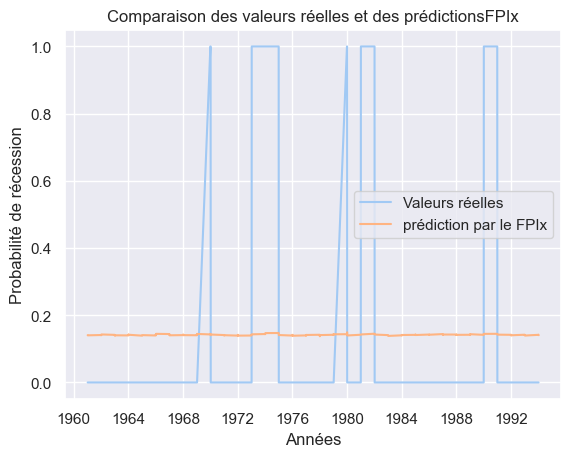

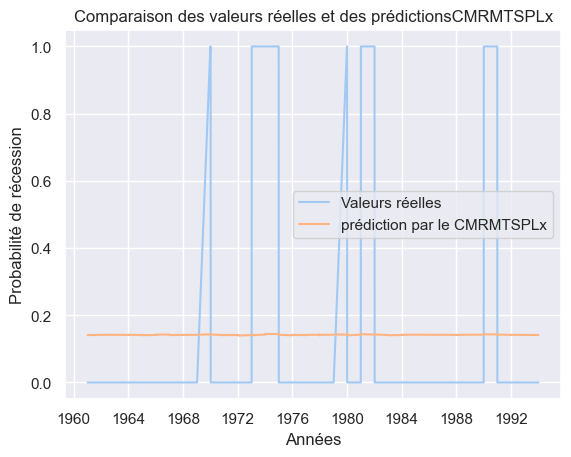

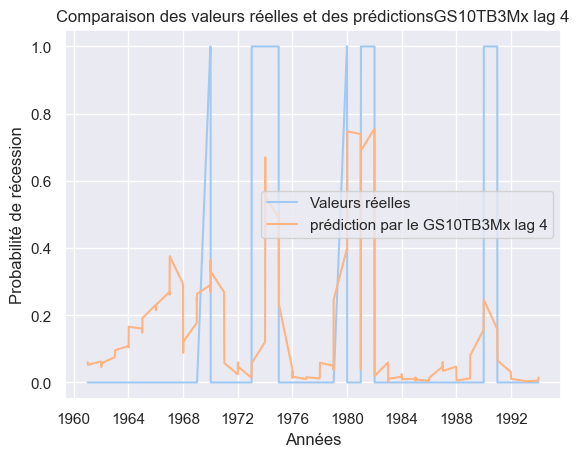

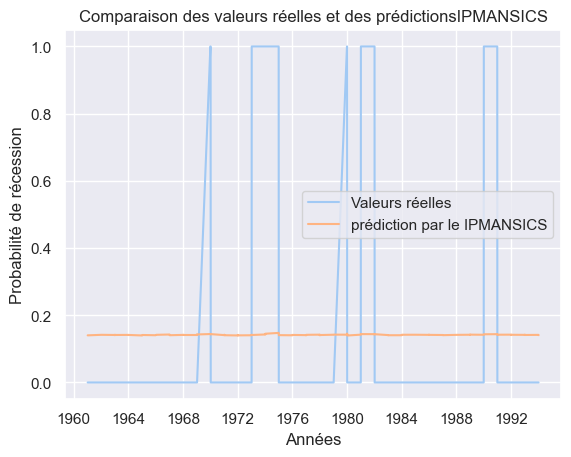

In [16]:
# in sample

for variable in meilleure_combinaison_F1:
       X_train_single = X_train[[variable]]
    
       model = LogisticRegression()
       model.fit(X_train_single, y_train)
    

       y_single_pred= model.predict_proba(X_train_single)[:, 1]
    
    # Tracer les courbes
       plt.plot(dates_train ,y_train, label='Valeurs réelles')
       plt.plot(dates_train,y_single_pred, label=(f'prédiction par le {variable}'))
       plt.xlabel('Années')
       plt.ylabel('Probabilité de récession')
       plt.title(f'Comparaison des valeurs réelles et des prédictions{variable}')
       plt.legend()
       plt.show()

# Machine Learning

## Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train[meilleure_combinaison_F1], y_train)
y_pred_rf = rf.predict(X_test[meilleure_combinaison_F1])
confusion_rf = confusion_matrix(y_test, y_pred_rf)
confusion_rf

array([[100,   2],
       [  3,   6]], dtype=int64)

In [18]:
print(f1_score(y_test, y_pred_rf))

0.7058823529411765


## AIC

In [19]:
Xpropre,Ypropre=dft.drop(columns=["USRECD","DATE"]), dft["USRECD"]
classement_aic=[]
for col in Xpropre.columns : # parcourt chaque colonne 
    X= sm.add_constant(Xpropre[col]) # ajoute constante au modele
    model =sm.Probit(Ypropre, X).fit()
    aic =model.aic
    classement_aic=classement_aic + [{"name":col,"AIC": aic}] 
classement_aic.sort(key=lambda x: x.get('AIC'),reverse=False) #trie en fonction du AIC
variables_30_aic=[variable['name'] for variable in classement_aic[:10]]

Optimization terminated successfully.
         Current function value: 0.298393
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313821
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.286730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300819
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.260632
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250117
  

In [20]:
X_train_aic=sm.add_constant(X_train[variables_30_aic])
probit_model_aic=sm.Probit(y_train,X_train_aic)
result_aic=probit_model_aic.fit()
print(result_aic.summary()) 



Optimization terminated successfully.
         Current function value: 0.079059
         Iterations 11
                          Probit Regression Results                           
Dep. Variable:                 USRECD   No. Observations:                  134
Model:                         Probit   Df Residuals:                      123
Method:                           MLE   Df Model:                           10
Date:                Sat, 27 May 2023   Pseudo R-squ.:                  0.8063
Time:                        19:11:17   Log-Likelihood:                -10.594
converged:                       True   LL-Null:                       -54.699
Covariance Type:            nonrobust   LLR p-value:                 1.212e-14
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2419      4.168     -0.298      0.766      -9.410       6.926
FPIx      

In [21]:
X_test_aic=sm.add_constant(X_test[variables_30_aic])
pred_aic = result_aic.predict(X_test_aic)


confusion_aic = confusion_matrix(y_test, pred_aic.apply(lambda x: 1 if x>0.5 else 0))
confusion_aic

array([[100,   2],
       [  3,   6]], dtype=int64)

## Select model from: Ridge

In [22]:
selector_ridge = SelectFromModel(estimator=Ridge(), max_features=5).fit(X_train, y_train)
selector_ridge_list = selector_ridge.get_feature_names_out().tolist()
X_train_ridge=sm.add_constant(X_train[selector_ridge_list])
probit_model_ridge=sm.Probit(y_train,X_train_ridge) 
result_ridge=probit_model_ridge.fit()

print(result_ridge.summary()) 

Optimization terminated successfully.
         Current function value: 0.094869
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:                 USRECD   No. Observations:                  134
Model:                         Probit   Df Residuals:                      128
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 May 2023   Pseudo R-squ.:                  0.7676
Time:                        19:11:19   Log-Likelihood:                -12.712
converged:                       True   LL-Null:                       -54.699
Covariance Type:            nonrobust   LLR p-value:                 1.236e-16
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5517      0.631     -4.046      0.000      -3.788      -1.316
CIVPART         

In [23]:
X_test_ridge=sm.add_constant(X_test[selector_ridge_list])
pred_ridge = result_ridge.predict(X_test_ridge)

confusion_ridge = confusion_matrix(y_test, pred_ridge.apply(lambda x: 1 if x>0.5 else 0))
confusion_ridge 

array([[100,   2],
       [  7,   2]], dtype=int64)

In [24]:
f1_score(y_test,pred_ridge.apply(lambda x: 1 if x>0.5 else 0))

0.30769230769230765

## Select From Model : Logistic + Penalité L1

### 1ère partie : sélection de variables

In [25]:
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression.fit(X_train, y_train)
selector_logit_cv = SelectFromModel(logistic_regression)
selector_logit_cv.fit_transform(X_train, y_train)
X_logit = X_train.columns[selector_logit_cv.get_support()].tolist()

### 2ème partie : tentative de calcul matrice confusion
model_logit = LogisticRegression()
X_train_logit1=sm.add_constant(X_train[X_logit])
result_logit = model_logit.fit(X_train_logit1,y_train)
X_test_logit2=sm.add_constant(X_test[X_logit])
pred_logit2 = result_logit.predict(X_test_logit2)

confusion_ridge = confusion_matrix(y_test, pred_logit2)
confusion_ridge 

c:\Users\yoanj\Documents\M1S2\Projet_s2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[102,   0],
       [  9,   0]], dtype=int64)

In [26]:
f1_score(y_test,pred_logit2)

0.0

## Select From Model : Logistic + Penalité L2

In [27]:
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression_l2.fit(X_train, y_train)

selector_logit_cv_l2 = SelectFromModel(logistic_regression_l2)
selector_logit_cv_l2.fit_transform(X_train, y_train)

#variables sélectionnées
X_logit_l2 = X_train.columns[selector_logit_cv_l2.get_support()].tolist()

model_logit_l2 = LogisticRegression()
X_train_logit_l2=sm.add_constant(X_train[X_logit_l2])
result_logit_l2 = model_logit.fit(X_train_logit_l2,y_train)

result_logit_l2 = model_logit.fit(sm.add_constant(X_train[X_logit_l2]),y_train)

#pred
X_test_l2=sm.add_constant(X_test[X_logit_l2])
pred_logit2_l2 = result_logit_l2.predict(X_test_l2)

#matrice confusion
confusion_ridge_l2 = confusion_matrix(y_test, pred_logit2_l2)
confusion_ridge_l2

c:\Users\yoanj\Documents\M1S2\Projet_s2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yoanj\Documents\M1S2\Projet_s2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

array([[92, 10],
       [ 3,  6]], dtype=int64)

In [28]:
f1_score(y_test,pred_logit2_l2)

0.4800000000000001

## Naive Bayes

In [29]:
# model naif 
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)
y_pred_bayes = model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy:", accuracy_bayes)
recall_bayes = recall_score(y_test, y_pred_bayes)
print("Recall:", recall_bayes)
f1_score_bayes = f1_score(y_test, y_pred_bayes)
print("F1_score:", f1_score_bayes)
balanced_accuracy_bayes = balanced_accuracy_score(y_test, y_pred_bayes)
print("Balanced:", balanced_accuracy_bayes)
confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
confusion_bayes

Accuracy: 0.918918918918919
Recall: 0.0
F1_score: 0.0
Balanced: 0.5


array([[102,   0],
       [  9,   0]], dtype=int64)

### Gaussienne + Sélection de variables

In [30]:
meilleure_combinaison_F1

['FPIx', 'CMRMTSPLx', 'GS10TB3Mx lag 4', 'IPMANSICS']

In [31]:
# avec la selection de variables
model_bayes = GaussianNB()
model_bayes.fit(X_train[meilleure_combinaison_F1], y_train)
y_pred_bayes = model_bayes.predict(X_test[meilleure_combinaison_F1])
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy:", accuracy_bayes)
recall_bayes = recall_score(y_test, y_pred_bayes)
print("Recall:", recall_bayes)
f1_score_bayes = f1_score(y_test, y_pred_bayes)
print("F1_score:", f1_score_bayes)
balanced_accuracy_bayes = balanced_accuracy_score(y_test, y_pred_bayes)
print("Balanced:", balanced_accuracy_bayes)

confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
confusion_bayes

Accuracy: 0.963963963963964
Recall: 1.0
F1_score: 0.8181818181818181
Balanced: 0.9803921568627452


array([[98,  4],
       [ 0,  9]], dtype=int64)

## Bernouilli

In [32]:
model_bayes = BernoulliNB()
model_bayes.fit(X_train, y_train)
y_pred_bayes = model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy:", accuracy_bayes)
recall_bayes = recall_score(y_test, y_pred_bayes)
print("Recall:", recall_bayes)
f1_score_bayes = f1_score(y_test, y_pred_bayes)
print("F1_score:", f1_score_bayes)
balanced_accuracy_bayes = balanced_accuracy_score(y_test, y_pred_bayes)
print("Balanced:", balanced_accuracy_bayes)
confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
confusion_bayes

Accuracy: 0.954954954954955
Recall: 1.0
F1_score: 0.782608695652174
Balanced: 0.9754901960784313


array([[97,  5],
       [ 0,  9]], dtype=int64)

### Bernouilli + Sélection de variables

In [33]:
# Avec la sélection de variables
model_bayes = BernoulliNB()
model_bayes.fit(X_train[meilleure_combinaison_F1], y_train)
y_pred_bayes = model_bayes.predict(X_test[meilleure_combinaison_F1])
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy:", accuracy_bayes)
recall_bayes = recall_score(y_test, y_pred_bayes)
print("Recall:", recall_bayes)
f1_score_bayes = f1_score(y_test, y_pred_bayes)
print("F1_score:", f1_score_bayes)
balanced_accuracy_bayes = balanced_accuracy_score(y_test, y_pred_bayes)
print("Balanced:", balanced_accuracy_bayes)

confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
confusion_bayes

Accuracy: 0.954954954954955
Recall: 1.0
F1_score: 0.782608695652174
Balanced: 0.9754901960784313


array([[97,  5],
       [ 0,  9]], dtype=int64)

# Résultats ML

| Modèle utilisé | Accuracy | Recall | F1-score | Balanced Accuracy |
| -------------- | -------- | ------ | -------- | ----------------- |
| Random Forest  | 0.95     | 0.66   | 0.70     | 0.82             |
| AIC            | 0.95     | 0.66   | 0.70     | 0.82              |
| Ridge          | 0.92     | 0.22   | 0.31     | 0.60              |
| Logit + $\ell_1$  | 0.92  | 0      | 0        | 0.5               |
| Logit + $\ell_2$  | 0.88  | 0.66   | 0.48     | 0.78              |
| Naive Bayes Gaussien total  | 0.92  | 0 | 0    | 0.5               |
| Naive Bayes Gaussien restreint | 0.96 | 1 | 0.81 | 0.98              |
| Naive Bayes Bernoulli total  | 0.95  | 1 | 0.78 | 0.97              |
| Naive Bayes Bernoulli restreint | 0.95 | 1 | 0.78 | 0.97              |
